# Задание 1:

***
-Визуализируйте распределение количественных переменных (возраст, уровень холестерина) с помощью box plot и гистограмм.

-Постройте столбчатые диаграммы для анализа распределения категориальных переменных (пол, тип боли в груди).

-Работаем с таблицей

Время выполнения 60 минут.
***


Информация о наборе данных:

Этот набор данных включает следующие характеристики:

age: Возраст пациента

sex: Пол пациента (0: женщина, 1: мужчина).

cp: Тип боли в груди.

0: Типичная стенокардия

1: Атипичная стенокардия

2: Боль, не связанная со стенокардией

3: Бессимптомная

trestbps: Артериальное давление в состоянии покоя.

slope: Наклон верхней части первого сегмента упражнения:

0: Подъем

1: Пологий

2: Спуск

chol: холестерин в сыворотке крови.

ca : Количество крупных сосудов (0-4), окрашенных при рентгеноскопии

fbs: Уровень сахара в крови натощак > 120 мг/дл.

restecg: Результаты электрокардиографии в состоянии покоя.

thal: Результат нагрузочного теста на таллий:

0: В норме

1: Исправленный дефект

2: Обратимый дефект

3: Не описано

thalach: Достигнута максимальная частота сердечных сокращений.

exang: Стенокардия, вызванная физической нагрузкой.

(1 = yes, 0 = no)

oldpeak: снижение уровня ST, вызванное физической нагрузкой по сравнению с отдыхом.

target: Статус сердечно-сосудистых заболеваний (0 = отсутствие заболевания, 1 = наличие заболевания)

### Загрузка библиотек.

In [1]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

### Загрузка данных.

In [ ]:
df_heart = pd.read_csv('/content/drive/MyDrive/Data/Доп. материал_Задание_ 1_heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Создадим отдельные переменные для количественных и категориальных переменных.

In [ ]:
# Количественные признаки
quantitative_features = ['age', 'chol']
# Качественные признаки
quality_features = ['sex', 'cp']

# Определим признаки, которые будут преобразованы в объектный тип данных
features_to_convert = [feature for feature in df_heart.columns if feature in quality_features]

# Преобразуем идентифицированные объекты в объектный тип данных
df_heart[features_to_convert] = df_heart[features_to_convert].astype('object')

df_heart[quality_features].dtypes

,0
sex,object
cp,object


In [ ]:
df_heart[quantitative_features].dtypes

,0
age,int64
chol,int64


## Визуализазия распределения количественных переменных (возраст, уровень холестерина) с помощью box plot и гистограмм.

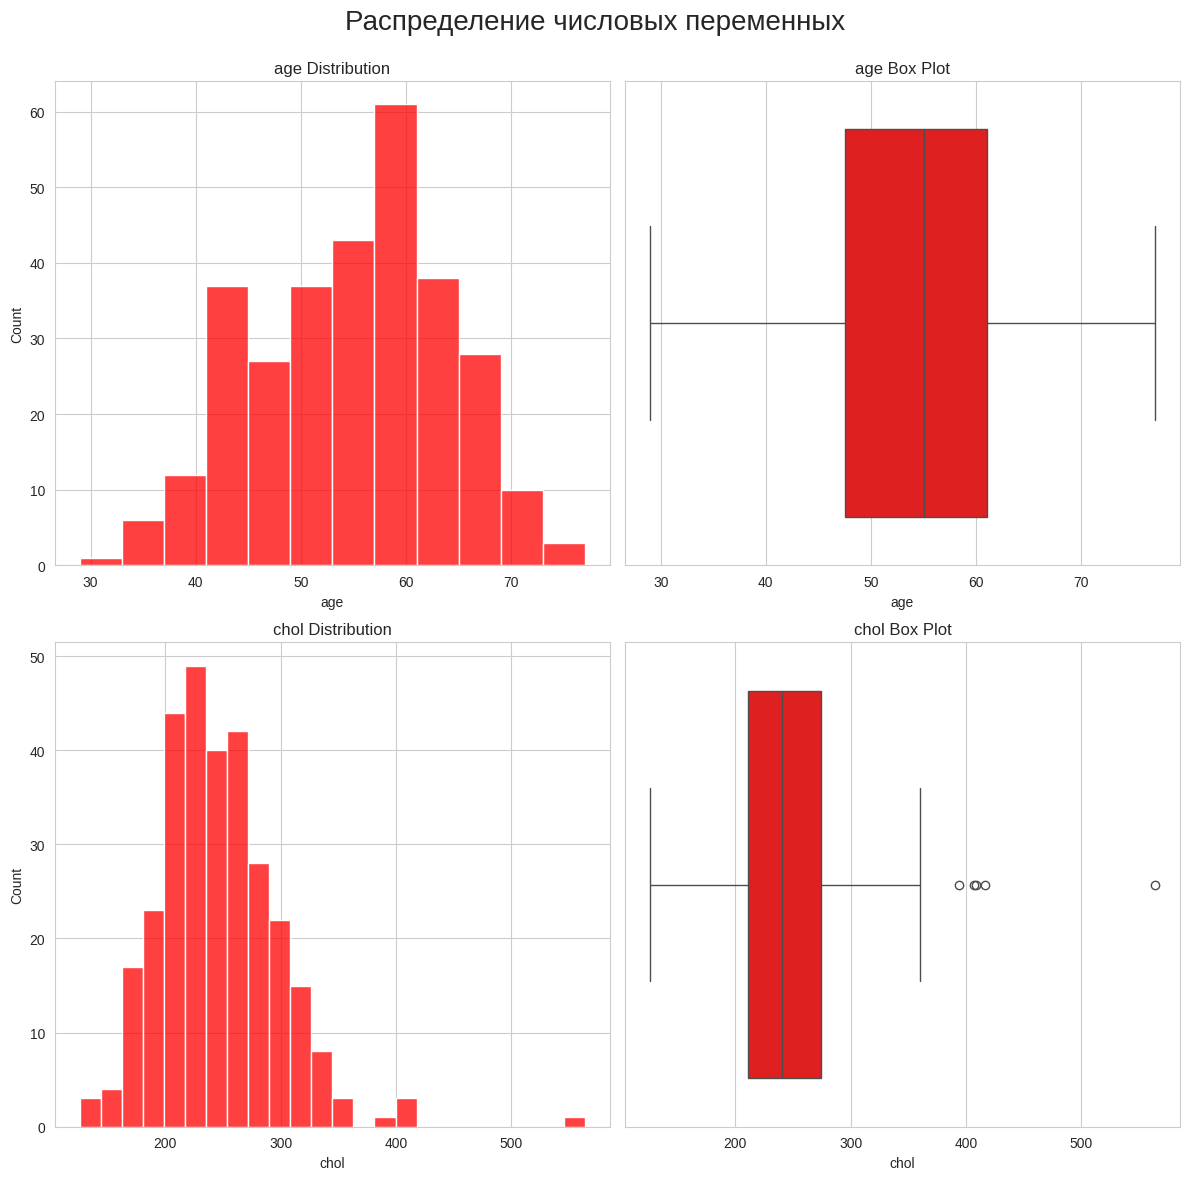

In [ ]:
# Определение количества признаков и вычисление количества строк и столбцов для сетки графиков
n_features = len(quantitative_features)
n_rows = n_features
n_cols = 2
# Создание сетки графиков
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
# Итерация по количественным признакам и построение гистограмм и box plot
for i, feature in enumerate(quantitative_features):
    # Гистограмма
    plt.style.use('seaborn-whitegrid')
    sns.histplot(data=df_heart, x=feature, ax=axs[i, 0], color='red')
    axs[i, 0].set_title(f'{feature} Distribution')

    # Box plot
    plt.style.use('seaborn-whitegrid')
    sns.boxplot(data=df_heart, x=feature, ax=axs[i, 1], color='red')
    axs[i, 1].set_title(f'{feature} Box Plot')
# Регулировка расстояния между графиками
plt.tight_layout()
# Отображение заголовка
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
# Отображение графиков
plt.show()

## Построение столбчатых диаграмм для анализа распределения категориальных переменных (пол, тип боли в груди).

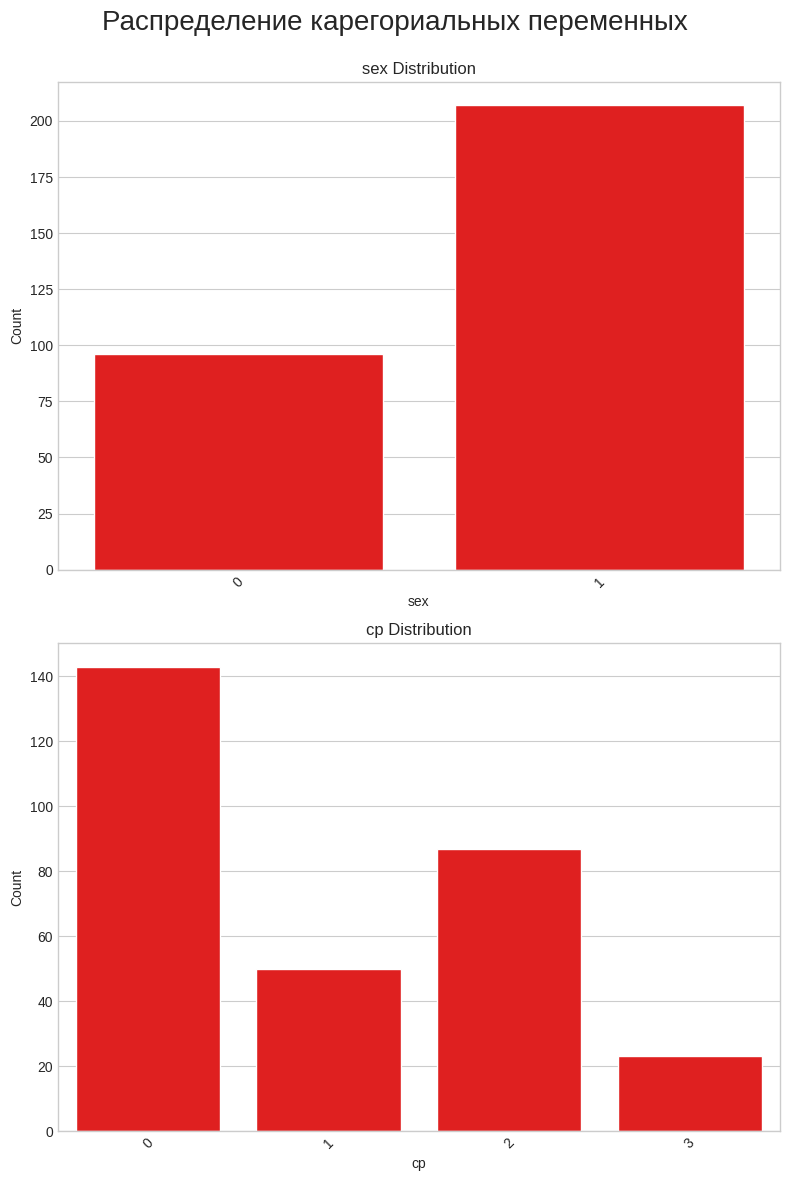

In [ ]:
# Определение количества признаков
n_features = len(quality_features)
# Создание сетки графиков
fig, axs = plt.subplots(n_features, figsize=(8, 6 * n_features))
# Проверка, является ли axs массивом или одиночным объектом Axes
if n_features == 1:
    axs = [axs]
# Итерация по категориальным признакам и построение столбчатых диаграмм
for i, feature in enumerate(quality_features):
    # Подсчет количества уникальных значений признака
    value_counts = df_heart[feature].value_counts()

    # Столбчатая диаграмма
    plt.style.use('seaborn-whitegrid')
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axs[i], color='red')
    axs[i].set_title(f'{feature} Distribution')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=45)
# Регулировка расстояния между графиками
plt.tight_layout()
# Отображение заголовка
plt.suptitle('Распределение карегориальных переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
# Отображение графиков
plt.show()

# Задание 2:

***
Вам предстоит провести эксперименты с моделью машинного обучения и изучить процесс кросс-валидации и подбора гиперпараметров. Ваша задача состоит в следующем:
1. Загрузите набор данных, подходящий для задачи классификации или регрессии. Вы можете использовать любой набор данных, предоставленный в библиотеке scikit-learn или другом доступном источнике данных.
2. Разделите данные на обучающую и тестовую выборки с помощью функции train_test_split из библиотеки scikit-learn.
3. Создайте модель машинного обучения, которую вы хотите использовать для предсказания на этом наборе данных. Например, можно использовать модель линейной регрессии или случайный лес для задачи регрессии, или модель логистической регрессии или случайный лес для задачи классификации.
4. Используйте метод кросс-валидации, чтобы оценить производительность модели на обучающей выборке. Например, можно использовать метод cross_val_score из библиотеки scikit-learn с использованием метрики оценки, такой как точность (accuracy) или среднеквадратичная ошибка (mean squared error).
5. Проведите подбор гиперпараметров модели с помощью метода GridSearchCV из библиотеки scikit-learn. Этот метод позволяет перебирать различные значения гиперпараметров и выбирать наилучшие значения на основе кросс-валидации.
6. Обучите модель с использованием оптимальных гиперпараметров на обучающей выборке и оцени ее производительность на тестовой выборке.
7. Проведите анализ результатов и сделай выводы о процессе кросс-валидации и подборе гиперпараметров в задачах машинного обучения.

Время выполнения: 40 минут
***

### Загрузка библиотек.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Загрузка данных.

In [ ]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[breast_cancer['data'], breast_cancer['target']],
                  columns= np.append(breast_cancer['feature_names'], ['target']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Описание датасета.

In [ ]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Набор данных по раку молочной железы в Висконсине (диагностика).
--------------------------------------------

**Характеристики набора данных:**

:Количество экземпляров: 569

:Количество атрибутов: 30 числовых, прогностических атрибутов и класс

:Информация об атрибутах:
- радиус (среднее значение расстояний от центра до точек на периметре)
- текстура (стандартное отклонение значений серой шкалы)
- периметр
- площадь
- гладкость (локальное изменение длины радиуса)
- компактность (периметр^2 / площадь - 1,0)
- вогнутость (выраженность вогнутых частей контура)
- вогнутые точки (количество вогнутых частей контура)
- симметрия
- фрактальная размерность («приближение береговой линии» - 1)

Среднее значение, стандартная ошибка и «худшее» или наибольшее (среднее из трех
худших/наибольших значений) из этих характеристик были вычислены для каждого изображения,
в результате чего получилось 30 характеристик. Например, поле 0 — это средний радиус, поле
10 — это радиус SE, поле 20 — это худший радиус.

- класс:
- WDBC-Злокачественный
- WDBC-Доброкачественный

:Сводная статистика:

======================================== ====== ======

Мин. Макс.

======================================== ====== ======

радиус (средний): 6,981 28,11

текстура (среднее): 9,71 39,28

периметр (среднее): 43,79 188,5

площадь (среднее): 143,5 2501,0

гладкость (среднее): 0,053 0,163

компактность (среднее): 0,019 0,345

вогнутость (среднее): 0,0 0,427

вогнутые точки (среднее): 0,0 0,201

симметрия (среднее): 0,106 0,304

фрактальная размерность (среднее): 0,05 0,097

радиус (стандартная ошибка): 0,112 2,873

текстура (стандартная ошибка): 0,36 4,885

периметр (стандартная ошибка): 0,757 21,98

площадь (стандартная ошибка): 6,802 542,2

гладкость (стандартная ошибка): 0,002 0,031

компактность (стандартная ошибка): 0,002 0,135

вогнутость (стандартная ошибка): 0,0 0,396

вогнутые точки (стандартная ошибка): 0,0 0,053

симметрия (стандартная ошибка): 0,008 0,079

фрактальная размерность (стандартная ошибка): 0,001 0,03

радиус (худший): 7,93 36,04

текстура (худший): 12,02 49,54

периметр (худший): 50,41 251,2

площадь (худший): 185,2 4254,0

гладкость (худший): 0,071 0,223

компактность (худший): 0,027 1,058

вогнутость (худший): 0,0 1,252

вогнутые точки (худший): 0,0 0,291

симметрия (худший): 0,156 0,664

фрактальная размерность (худший): 0,055 0,208

===================================== ======= =======

### EDA.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
for col in list(df.columns):
  print(df[col].describe())

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean radius, dtype: float64
count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: mean texture, dtype: float64
count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: mean perimeter, dtype: float64
count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: mean area, dtype: float64
count    569.000000
mean       0.096360
std        0.014064
min        0.052630
25%        0.086370
50%        0.095870
75%        0.105300
max        0.163400
Name: mean smoothness, dtype: float64
count    569.000

In [ ]:
list(df.columns)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [ ]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

Данные не нуждаются в очистке, но необходимо их нормализовать.

In [ ]:
df['target'].value_counts()

,count
target,
1.0,357
0.0,212


Есть дисбаланс классов. Необходимо сбалансировать данные.

### Разделение на Х и у.

In [ ]:
X = df.drop(columns='target')
y = df['target']

In [ ]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
564,0.0
565,0.0
566,0.0
567,0.0


### Нормализация данных.

In [ ]:
x_normalize = preprocessing.MinMaxScaler()
X_norm = x_normalize.fit_transform(X)
X_norm

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

### Балансировка классов с помощью SMOTE.

In [ ]:
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_norm, y)
print('X_balanced shape:', X_balanced.shape)
print('y_balanced shape:', y_balanced.shape)

X_balanced shape: (714, 30)
y_balanced shape: (714,)


### Разбиение на трейн и тест.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced,
                                                    stratify=y_balanced,
                                                    train_size=0.75,
                                                    random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (535, 30)
X_test shape: (179, 30)


### Создание модели машинного обучения и оценка ее качества.

#### RandomForestClassifier.

In [ ]:
rf_model = RandomForestClassifier(random_state = 42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
print("Accuracy of Random Forest: ", accuracy_score(y_test, y_pred))

Accuracy of Random Forest:  0.9720670391061452


### Оценка производительности модели на обучающей выборке при помощи метода кросс-валидации.

In [ ]:
all_accuracies = cross_val_score(estimator=rf_model, X=X_train, y=y_train, cv=5)
print(all_accuracies)

[0.95327103 0.98130841 0.97196262 0.96261682 0.96261682]


Средняя оценка на обучающей выборке.

In [ ]:
print(all_accuracies.mean())

0.966355140186916


Стандартное отклонение.

In [ ]:
print(all_accuracies.std())

0.009530877595500534


### Подбор гиперпараметров модели с помощью метода GridSearchCV.

In [ ]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [ ]:
gd_sr = GridSearchCV(estimator=rf_model,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [ ]:
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 300, 500, 800, 1000]},
             scoring='accuracy')

In [ ]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 500}


In [ ]:
best_result = gd_sr.best_score_
print(best_result)

0.9738317757009346


### Обучение модели с использованием оптимальных гиперпараметров на обучающей выборке и оценка ее производительности на тестовой выборке.

In [ ]:
rf_best_model = RandomForestClassifier(random_state = 42, bootstrap=False, criterion='gini', n_estimators=500)

rf_best_model.fit(X_train, y_train)

y_pred = rf_best_model.predict(X_test)
print("Accuracy of Random Forest: ", accuracy_score(y_test, y_pred))

Accuracy of Random Forest:  0.994413407821229


### Анализ результатов и выводы о процессе кросс-валидации и подборе гиперпараметров в задачах машинного обучения.

<Axes: >

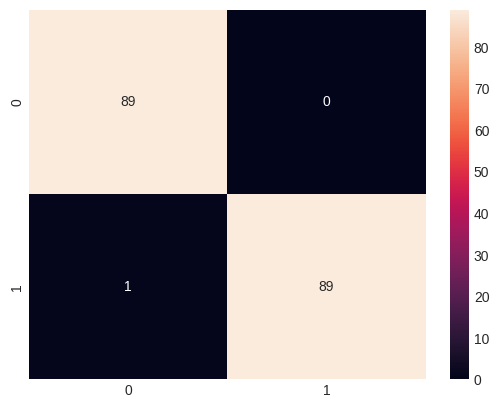

In [ ]:
cm=confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

1. Оценка модели на тестовой выборке выросла на 2% по сравнению с исходной моделью и составила 99% точности. Модель сделала всего одну ошибку.
2. Перекрестная проверка может быть использована для точной оценки производительности модели.
3. Подбор гиперпараметров очень важен в задачах машинного обучения для достижения наилучшей производительности модели.

# Задание 3:
-Задание на ознакомление с датасетом.

-Необходимо препроцессировать данные, выбрать только содержательные колонки; сделать описательную статистику нескольких параметров;

-Cформулировать гипотезу о взаимосвязи ваших параметров (например, смертность при раке зависит от пола) и проверить ее с помощью подходящего метода визуализации.

-Если сможете выбрать метод и рассчитать статистику вывода, это будет плюсом.

### Загрузка библиотек.

In [228]:
from scipy.stats import shapiro, wilcoxon, mannwhitneyu

### Загрузка данных.

In [4]:
!tar -xf /content/drive/MyDrive/data/clinical.project-tcga-dlbc.2023-09-20.tar.gz -C /content/drive/MyDrive/data

In [147]:
df_cl = pd.read_table('/content/drive/MyDrive/data/clinical.tsv')
df_cl.head()

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,27,'--,'--,'--,'--,-10075,391,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"


In [25]:
df_ex = pd.read_table('/content/drive/MyDrive/data/exposure.tsv')
df_ex.head()

,case_id,case_submitter_id,project_id,age_at_onset,alcohol_days_per_week,alcohol_drinks_per_day,alcohol_history,alcohol_intensity,alcohol_type,asbestos_exposure,...,smoking_frequency,time_between_waking_and_first_smoke,tobacco_smoking_onset_year,tobacco_smoking_quit_year,tobacco_smoking_status,tobacco_use_per_day,type_of_smoke_exposure,type_of_tobacco_used,weight,years_smoked
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
1,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
2,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
3,0e9fcccc-0630-408d-a121-2c6413824cb7,TCGA-FF-8062,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
4,1843c82e-7a35-474f-9f79-c0a9af9aa09c,TCGA-FA-A4BB,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


In [26]:
df_fam = pd.read_table('/content/drive/MyDrive/data/family_history.tsv')
df_fam.head()

,case_id,case_submitter_id,project_id,relationship_age_at_diagnosis,relationship_gender,relationship_primary_diagnosis,relationship_type,relative_with_cancer_history,relatives_with_cancer_history_count


In [27]:
df_fol = pd.read_table('/content/drive/MyDrive/data/follow_up.tsv')
df_fol.head()

,case_id,case_submitter_id,project_id,adverse_event,adverse_event_grade,aids_risk_factors,barretts_esophagus_goblet_cells_present,bmi,body_surface_area,cause_of_response,...,second_gene_symbol,specialized_molecular_test,test_analyte_type,test_result,test_units,test_value,transcript,variant_origin,variant_type,zygosity


In [28]:
df_pat = pd.read_table('/content/drive/MyDrive/data/pathology_detail.tsv')
df_pat.head()

,case_id,case_submitter_id,project_id,diagnosis_id,diagnosis_submitter_id,additional_pathology_findings,anaplasia_present,anaplasia_present_type,bone_marrow_malignant_cells,breslow_thickness,...,rhabdoid_percent,rhabdoid_present,sarcomatoid_percent,sarcomatoid_present,size_extraocular_nodule,transglottic_extension,tumor_largest_dimension_diameter,tumor_thickness,vascular_invasion_present,vascular_invasion_type


Данные есть только в двух файлах из пяти.

### Препроцессинг.

In [148]:
col_cl = [column for column in df_cl]
col_cl

['case_id',
 'case_submitter_id',
 'project_id',
 'age_at_index',
 'age_is_obfuscated',
 'cause_of_death',
 'cause_of_death_source',
 'country_of_residence_at_enrollment',
 'days_to_birth',
 'days_to_death',
 'ethnicity',
 'gender',
 'occupation_duration_years',
 'premature_at_birth',
 'race',
 'vital_status',
 'weeks_gestation_at_birth',
 'year_of_birth',
 'year_of_death',
 'adrenal_hormone',
 'age_at_diagnosis',
 'ajcc_clinical_m',
 'ajcc_clinical_n',
 'ajcc_clinical_stage',
 'ajcc_clinical_t',
 'ajcc_pathologic_m',
 'ajcc_pathologic_n',
 'ajcc_pathologic_stage',
 'ajcc_pathologic_t',
 'ajcc_staging_system_edition',
 'anaplasia_present',
 'anaplasia_present_type',
 'ann_arbor_b_symptoms',
 'ann_arbor_b_symptoms_described',
 'ann_arbor_clinical_stage',
 'ann_arbor_extranodal_involvement',
 'ann_arbor_pathologic_stage',
 'best_overall_response',
 'breslow_thickness',
 'burkitt_lymphoma_clinical_variant',
 'child_pugh_classification',
 'circumferential_resection_margin',
 'classificatio

In [149]:
df_cl = df_cl[col_cl].replace("'--", None)

In [150]:
df_cl.head()

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,None,None,None,None,-22454,248,...,None,None,None,None,None,None,None,yes,None,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,None,None,None,None,-22454,248,...,None,None,None,None,None,None,None,no,None,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,None,None,None,None,-27025,58,...,None,None,None,None,None,None,None,no,None,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,None,None,None,None,-27025,58,...,None,None,None,None,None,None,None,yes,None,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,27,None,None,None,None,-10075,391,...,None,None,None,None,None,None,None,yes,None,"Pharmaceutical Therapy, NOS"


In [151]:
df_cl.describe()

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
count,106,106,106,96,0,0,0,0,96,18,...,0,0,0,0,0,0,0,96,0,96
unique,58,58,1,34,0,0,0,0,48,9,...,0,0,0,0,0,0,0,3,0,2
top,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,67,NaN,NaN,NaN,NaN,-22454,248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,"Pharmaceutical Therapy, NOS"
freq,2,2,106,6,NaN,NaN,NaN,NaN,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,NaN,48


In [152]:
for coll in col_cl:
  if df_cl[coll].describe()['unique'] == 0 or df_cl[coll].describe()['unique'] == 1:
    df_cl = df_cl.drop(columns = coll)

In [153]:
df_cl.describe()

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_or_therapy,treatment_type
count,106,106,96,96,18,96,96,96,96,96,...,84,92,86,96,96,96,96,96,96,96
unique,58,58,34,48,9,2,2,3,2,34,...,4,2,41,10,2,20,20,14,3,2
top,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,67,-22454,248,not hispanic or latino,female,white,Alive,1943,...,Stage II,No,132,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,yes,"Pharmaceutical Therapy, NOS"
freq,2,2,6,2,2,72,52,58,78,6,...,34,50,4,76,94,32,32,18,51,48


In [35]:
col_ex = [column for column in df_ex]
col_ex

['case_id',
 'case_submitter_id',
 'project_id',
 'age_at_onset',
 'alcohol_days_per_week',
 'alcohol_drinks_per_day',
 'alcohol_history',
 'alcohol_intensity',
 'alcohol_type',
 'asbestos_exposure',
 'bmi',
 'cigarettes_per_day',
 'coal_dust_exposure',
 'environmental_tobacco_smoke_exposure',
 'exposure_duration',
 'exposure_duration_years',
 'exposure_type',
 'height',
 'marijuana_use_per_week',
 'pack_years_smoked',
 'parent_with_radiation_exposure',
 'radon_exposure',
 'respirable_crystalline_silica_exposure',
 'secondhand_smoke_as_child',
 'smokeless_tobacco_quit_age',
 'smoking_frequency',
 'time_between_waking_and_first_smoke',
 'tobacco_smoking_onset_year',
 'tobacco_smoking_quit_year',
 'tobacco_smoking_status',
 'tobacco_use_per_day',
 'type_of_smoke_exposure',
 'type_of_tobacco_used',
 'weight',
 'years_smoked']

In [36]:
df_ex = df_ex[col_ex].replace("'--", None)

In [37]:
df_ex.describe()

,case_id,case_submitter_id,project_id,age_at_onset,alcohol_days_per_week,alcohol_drinks_per_day,alcohol_history,alcohol_intensity,alcohol_type,asbestos_exposure,...,smoking_frequency,time_between_waking_and_first_smoke,tobacco_smoking_onset_year,tobacco_smoking_quit_year,tobacco_smoking_status,tobacco_use_per_day,type_of_smoke_exposure,type_of_tobacco_used,weight,years_smoked
count,48,48,48,0,0,0,48,0,0,0,...,0,0,0,0,0,0,0,0,0,0
unique,48,48,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
top,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,NaN,NaN,NaN,Not Reported,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,48,NaN,NaN,NaN,48,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
for coll in col_ex:
  if df_ex[coll].describe()['unique'] == 0 or df_ex[coll].describe()['unique'] == 1:
    df_ex = df_ex.drop(columns = coll)

In [39]:
df_ex.describe()

,case_id,case_submitter_id
count,48,48
unique,48,48
top,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1
freq,1,1


Содержательные данные присутствуют только в таблице clinical.tsv.

In [154]:
df_cl.dtypes

,0
case_id,object
case_submitter_id,object
age_at_index,object
days_to_birth,object
days_to_death,object
ethnicity,object
gender,object
race,object
vital_status,object
year_of_birth,object


In [155]:
df_cl.isnull().sum()

,0
case_id,0
case_submitter_id,0
age_at_index,10
days_to_birth,10
days_to_death,88
ethnicity,10
gender,10
race,10
vital_status,10
year_of_birth,10


In [156]:
df_cl.head()

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,Stage I,No,22,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,Stage I,No,22,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,no,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,None,No,6,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,no,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,None,No,6,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,yes,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,27,-10075,391,hispanic or latino,female,white,Dead,1984,...,Stage II,No,None,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,yes,"Pharmaceutical Therapy, NOS"


In [157]:
df_cl.shape

(106, 23)

In [158]:
cols = [column for column in df_cl]
cols

['case_id',
 'case_submitter_id',
 'age_at_index',
 'days_to_birth',
 'days_to_death',
 'ethnicity',
 'gender',
 'race',
 'vital_status',
 'year_of_birth',
 'year_of_death',
 'age_at_diagnosis',
 'ann_arbor_b_symptoms',
 'ann_arbor_clinical_stage',
 'ann_arbor_extranodal_involvement',
 'days_to_last_follow_up',
 'icd_10_code',
 'prior_treatment',
 'site_of_resection_or_biopsy',
 'tissue_or_organ_of_origin',
 'year_of_diagnosis',
 'treatment_or_therapy',
 'treatment_type']

In [159]:
df_cl[df_cl[cols].isnull().sum(axis=1) < 8]

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,Stage I,No,22,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,Stage I,No,22,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,no,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,None,No,6,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,no,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,None,No,6,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,yes,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,27,-10075,391,hispanic or latino,female,white,Dead,1984,...,Stage II,No,None,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,yes,"Pharmaceutical Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,f8cf647b-1447-4ac3-8c43-bef07765cabf,TCGA-G8-6326,52,-19238,None,not hispanic or latino,male,white,Alive,1957,...,Stage IV,Yes,2131,C48.1,No,Specified parts of peritoneum,Specified parts of peritoneum,2009,no,"Radiation Therapy, NOS"
102,f978cb0f-d319-4c01-b4c5-23ae1403a106,TCGA-FF-8047,38,-13996,None,not hispanic or latino,female,asian,Alive,1973,...,Stage II,No,126,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,no,"Radiation Therapy, NOS"
103,f978cb0f-d319-4c01-b4c5-23ae1403a106,TCGA-FF-8047,38,-13996,None,not hispanic or latino,female,asian,Alive,1973,...,Stage II,No,126,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,yes,"Pharmaceutical Therapy, NOS"
104,fdecb74f-ac4e-46b1-b23a-5f7fde96ef9f,TCGA-GS-A9U3,77,-28474,None,hispanic or latino,female,white,Alive,1928,...,Stage III,No,3394,C83.3,No,Lymph nodes of inguinal region or leg,Lymph nodes of inguinal region or leg,2005,no,"Radiation Therapy, NOS"


In [160]:
df = df_cl[df_cl[cols].isnull().sum(axis=1) < 8]

In [161]:
df = df.replace(to_replace=[None], value=np.nan)
df

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,Stage I,No,22,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,Stage I,No,22,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,no,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,NaN,No,6,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,no,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,NaN,No,6,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,yes,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,27,-10075,391,hispanic or latino,female,white,Dead,1984,...,Stage II,No,NaN,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,yes,"Pharmaceutical Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,f8cf647b-1447-4ac3-8c43-bef07765cabf,TCGA-G8-6326,52,-19238,NaN,not hispanic or latino,male,white,Alive,1957,...,Stage IV,Yes,2131,C48.1,No,Specified parts of peritoneum,Specified parts of peritoneum,2009,no,"Radiation Therapy, NOS"
102,f978cb0f-d319-4c01-b4c5-23ae1403a106,TCGA-FF-8047,38,-13996,NaN,not hispanic or latino,female,asian,Alive,1973,...,Stage II,No,126,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,no,"Radiation Therapy, NOS"
103,f978cb0f-d319-4c01-b4c5-23ae1403a106,TCGA-FF-8047,38,-13996,NaN,not hispanic or latino,female,asian,Alive,1973,...,Stage II,No,126,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,yes,"Pharmaceutical Therapy, NOS"
104,fdecb74f-ac4e-46b1-b23a-5f7fde96ef9f,TCGA-GS-A9U3,77,-28474,NaN,hispanic or latino,female,white,Alive,1928,...,Stage III,No,3394,C83.3,No,Lymph nodes of inguinal region or leg,Lymph nodes of inguinal region or leg,2005,no,"Radiation Therapy, NOS"


In [162]:
df.isnull().sum()

,0
case_id,0
case_submitter_id,0
age_at_index,0
days_to_birth,0
days_to_death,78
ethnicity,0
gender,0
race,0
vital_status,0
year_of_birth,0


In [163]:
df[['vital_status', 'year_of_death']]

,vital_status,year_of_death
0,Dead,NaN
1,Dead,NaN
2,Dead,NaN
3,Dead,NaN
4,Dead,2012
...,...,...
101,Alive,NaN
102,Alive,NaN
103,Alive,NaN
104,Alive,NaN


In [164]:
df.loc[df.vital_status=='Alive', ['vital_status','year_of_death']].describe()

,vital_status,year_of_death
count,78,0
unique,1,0
top,Alive,NaN
freq,78,NaN


In [165]:
df.loc[(df['vital_status'] == 'Alive'), 'year_of_death'] = -1

In [166]:
df.isnull().sum()

,0
case_id,0
case_submitter_id,0
age_at_index,0
days_to_birth,0
days_to_death,78
ethnicity,0
gender,0
race,0
vital_status,0
year_of_birth,0


In [167]:
df = df.reset_index()
del df['index']
df

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,Stage I,No,22,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,Stage I,No,22,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,no,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,NaN,No,6,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,no,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,NaN,No,6,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,yes,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,27,-10075,391,hispanic or latino,female,white,Dead,1984,...,Stage II,No,NaN,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,yes,"Pharmaceutical Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,f8cf647b-1447-4ac3-8c43-bef07765cabf,TCGA-G8-6326,52,-19238,NaN,not hispanic or latino,male,white,Alive,1957,...,Stage IV,Yes,2131,C48.1,No,Specified parts of peritoneum,Specified parts of peritoneum,2009,no,"Radiation Therapy, NOS"
92,f978cb0f-d319-4c01-b4c5-23ae1403a106,TCGA-FF-8047,38,-13996,NaN,not hispanic or latino,female,asian,Alive,1973,...,Stage II,No,126,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,no,"Radiation Therapy, NOS"
93,f978cb0f-d319-4c01-b4c5-23ae1403a106,TCGA-FF-8047,38,-13996,NaN,not hispanic or latino,female,asian,Alive,1973,...,Stage II,No,126,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,yes,"Pharmaceutical Therapy, NOS"
94,fdecb74f-ac4e-46b1-b23a-5f7fde96ef9f,TCGA-GS-A9U3,77,-28474,NaN,hispanic or latino,female,white,Alive,1928,...,Stage III,No,3394,C83.3,No,Lymph nodes of inguinal region or leg,Lymph nodes of inguinal region or leg,2005,no,"Radiation Therapy, NOS"


In [168]:
df.loc[df.vital_status=='Alive', ['vital_status','days_to_death']].describe()

,vital_status,days_to_death
count,78,0
unique,1,0
top,Alive,NaN
freq,78,NaN


In [169]:
df.loc[(df['vital_status'] == 'Alive'), 'days_to_death'] = -1

In [170]:
df = df.apply(pd.to_numeric, errors='ignore')
df.dtypes

,0
case_id,object
case_submitter_id,object
age_at_index,int64
days_to_birth,int64
days_to_death,int64
ethnicity,object
gender,object
race,object
vital_status,object
year_of_birth,int64


In [171]:
df.loc[(df['year_of_death'].isna()), 'year_of_death'] = df.loc[(df['year_of_death'].isna()), 'age_at_index'] + df.loc[(df['year_of_death'].isna()), 'year_of_birth'] + df.loc[(df['year_of_death'].isna()), 'days_to_death'] / 365
df['year_of_death'] = df['year_of_death'].astype(int)

In [172]:
df.isnull().sum()

,0
case_id,0
case_submitter_id,0
age_at_index,0
days_to_birth,0
days_to_death,0
ethnicity,0
gender,0
race,0
vital_status,0
year_of_birth,0


In [173]:
df[['ann_arbor_b_symptoms', 'ann_arbor_clinical_stage', 'ann_arbor_extranodal_involvement', 'days_to_last_follow_up']].describe(include='all')

,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up
count,92,84,92,86.000000
unique,2,4,2,NaN
top,No,Stage II,No,NaN
freq,70,34,50,NaN
mean,NaN,NaN,NaN,1274.372093
std,NaN,NaN,NaN,1307.703277
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,434.250000
50%,NaN,NaN,NaN,832.000000
75%,NaN,NaN,NaN,1581.000000


In [174]:
df['ann_arbor_clinical_stage'].unique()

array(['Stage I', nan, 'Stage II', 'Stage IV', 'Stage III'], dtype=object)

In [175]:
df['ann_arbor_clinical_stage'] = df['ann_arbor_clinical_stage'].replace({np.nan: -1, 'Stage I': 1, 'Stage II': 2, 'Stage III': 3, 'Stage IV': 4})
df['ann_arbor_clinical_stage']

,ann_arbor_clinical_stage
0,1
1,1
2,-1
3,-1
4,2
...,...
91,4
92,2
93,2
94,3


In [176]:
df['ann_arbor_clinical_stage'].value_counts(dropna=False)

,count
ann_arbor_clinical_stage,
2,34
4,24
1,16
-1,12
3,10


In [177]:
df['ann_arbor_b_symptoms'].value_counts(dropna=False)

,count
ann_arbor_b_symptoms,
No,70
Yes,22
NaN,4


In [178]:
df['ann_arbor_extranodal_involvement'].value_counts(dropna=False)

,count
ann_arbor_extranodal_involvement,
No,50
Yes,42
NaN,4


In [179]:
df.loc[(df['ann_arbor_b_symptoms'].isna()) & (df['ann_arbor_extranodal_involvement'].isna()), ['ann_arbor_b_symptoms','ann_arbor_extranodal_involvement', 'treatment_or_therapy']]

,ann_arbor_b_symptoms,ann_arbor_extranodal_involvement,treatment_or_therapy
16,NaN,NaN,no
17,NaN,NaN,yes
32,NaN,NaN,no
33,NaN,NaN,no


In [180]:
df['ann_arbor_b_symptoms'] = df['ann_arbor_b_symptoms'].replace({np.nan: -1, 'No': 0, 'Yes': 1})
df['ann_arbor_b_symptoms'].value_counts(dropna=False)

,count
ann_arbor_b_symptoms,
0,70
1,22
-1,4


In [181]:
df['ann_arbor_extranodal_involvement'] = df['ann_arbor_extranodal_involvement'].replace({np.nan: -1, 'No': 0, 'Yes': 1})
df['ann_arbor_extranodal_involvement'].value_counts(dropna=False)

,count
ann_arbor_extranodal_involvement,
0,50
1,42
-1,4


In [182]:
df['days_to_last_follow_up'].value_counts(dropna=False)

,count
days_to_last_follow_up,
NaN,10
132.0,4
1581.0,4
22.0,2
972.0,2
965.0,2
553.0,2
1334.0,2
2983.0,2


In [183]:
df.loc[(df['days_to_last_follow_up'].isna()), 'days_to_last_follow_up'] = -1

In [184]:
df.isnull().sum()

,0
case_id,0
case_submitter_id,0
age_at_index,0
days_to_birth,0
days_to_death,0
ethnicity,0
gender,0
race,0
vital_status,0
year_of_birth,0


In [185]:
df.shape

(96, 23)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case_id                           96 non-null     object 
 1   case_submitter_id                 96 non-null     object 
 2   age_at_index                      96 non-null     int64  
 3   days_to_birth                     96 non-null     int64  
 4   days_to_death                     96 non-null     int64  
 5   ethnicity                         96 non-null     object 
 6   gender                            96 non-null     object 
 7   race                              96 non-null     object 
 8   vital_status                      96 non-null     object 
 9   year_of_birth                     96 non-null     int64  
 10  year_of_death                     96 non-null     int64  
 11  age_at_diagnosis                  96 non-null     int64  
 12  ann_arbor_

In [187]:
df

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,1,0,22.0,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,1,0,22.0,C48.1,No,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,2013,no,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,-1,0,6.0,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,no,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,-1,0,6.0,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2013,yes,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,27,-10075,391,hispanic or latino,female,white,Dead,1984,...,2,0,-1.0,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,yes,"Pharmaceutical Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,f8cf647b-1447-4ac3-8c43-bef07765cabf,TCGA-G8-6326,52,-19238,-1,not hispanic or latino,male,white,Alive,1957,...,4,1,2131.0,C48.1,No,Specified parts of peritoneum,Specified parts of peritoneum,2009,no,"Radiation Therapy, NOS"
92,f978cb0f-d319-4c01-b4c5-23ae1403a106,TCGA-FF-8047,38,-13996,-1,not hispanic or latino,female,asian,Alive,1973,...,2,0,126.0,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,no,"Radiation Therapy, NOS"
93,f978cb0f-d319-4c01-b4c5-23ae1403a106,TCGA-FF-8047,38,-13996,-1,not hispanic or latino,female,asian,Alive,1973,...,2,0,126.0,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",2011,yes,"Pharmaceutical Therapy, NOS"
94,fdecb74f-ac4e-46b1-b23a-5f7fde96ef9f,TCGA-GS-A9U3,77,-28474,-1,hispanic or latino,female,white,Alive,1928,...,3,0,3394.0,C83.3,No,Lymph nodes of inguinal region or leg,Lymph nodes of inguinal region or leg,2005,no,"Radiation Therapy, NOS"


In [188]:
df[df.duplicated()]

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_or_therapy,treatment_type


Препроцессинг выполнен. Кроме удаления пустых строк, произведена замена пустых значений.

### Описательная статистика.

#### year_of_diagnosis

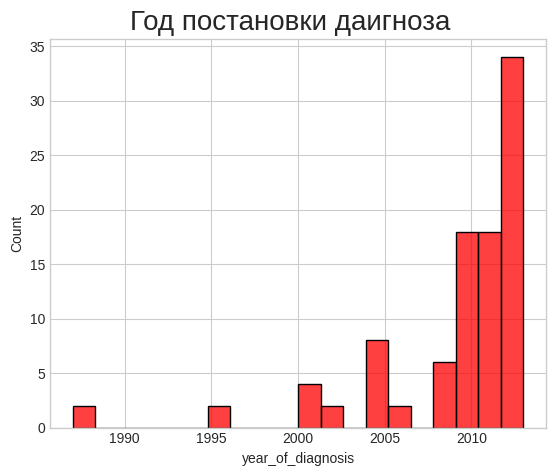

In [194]:
# Гистограмма
plt.style.use('seaborn-whitegrid')
sns.histplot(data=df, x='year_of_diagnosis', color='red')
# Отображение заголовка
plt.suptitle('Год постановки даигноза', fontsize=20)
#plt.tight_layout()
plt.subplots_adjust(top=0.92)
# Отображение графика
plt.show()

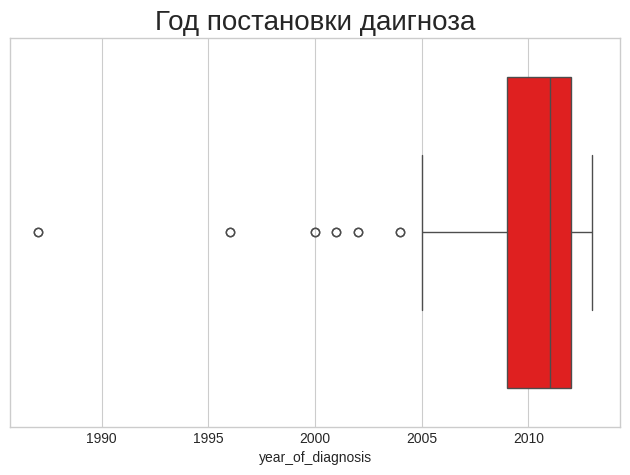

In [193]:
# Box plot
plt.style.use('seaborn-whitegrid')
sns.boxplot(data=df, x='year_of_diagnosis', color='red')
# Отображение заголовка
plt.suptitle('Год постановки даигноза', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
# Отображение графика
plt.show()

In [202]:
df['year_of_diagnosis'].describe()

,year_of_diagnosis
count,96.000000
mean,2009.145833
std,5.005217
min,1987.000000
25%,2009.000000
50%,2011.000000
75%,2012.000000
max,2013.000000


Количественная переменная. Данные распределены ненормально. Представлена в диапазоне от 1987 до 2013.

#### vital_status

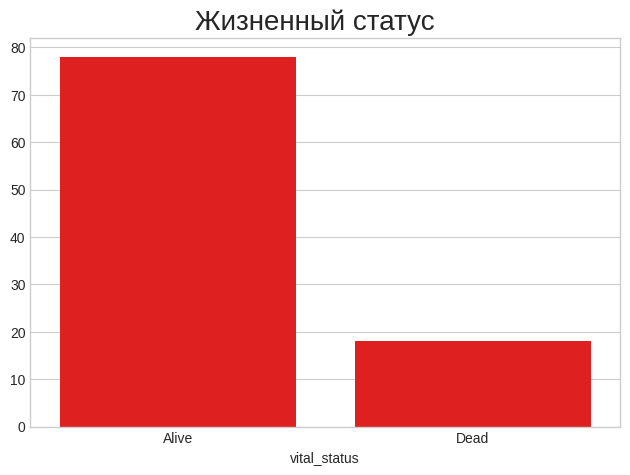

In [199]:
# Подсчет количества уникальных значений признака
value_counts = df['vital_status'].value_counts()
# Столбчатая диаграмма
plt.style.use('seaborn-whitegrid')
sns.barplot(x=value_counts.index, y=value_counts.values, color='red')
# Отображение заголовка
plt.suptitle('Жизненный статус', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
# Отображение графиков
plt.show()

Качественная переменная. По этой переменной данные не сбалансированы. Представлена двумя категориями: живой и мертвый.

#### age_at_diagnosis

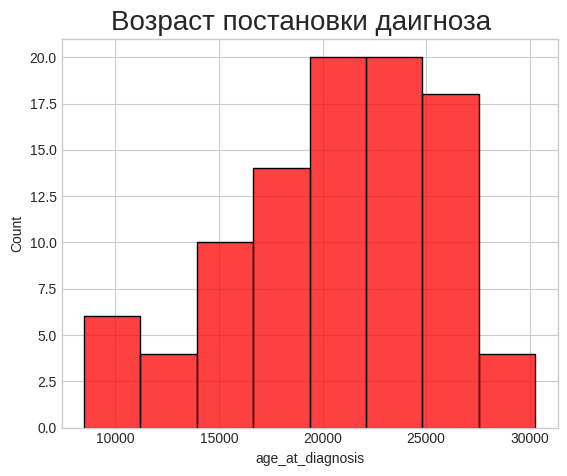

In [200]:
# Гистограмма
plt.style.use('seaborn-whitegrid')
sns.histplot(data=df, x='age_at_diagnosis', color='red')
# Отображение заголовка
plt.suptitle('Возраст постановки даигноза', fontsize=20)
#plt.tight_layout()
plt.subplots_adjust(top=0.92)
# Отображение графика
plt.show()

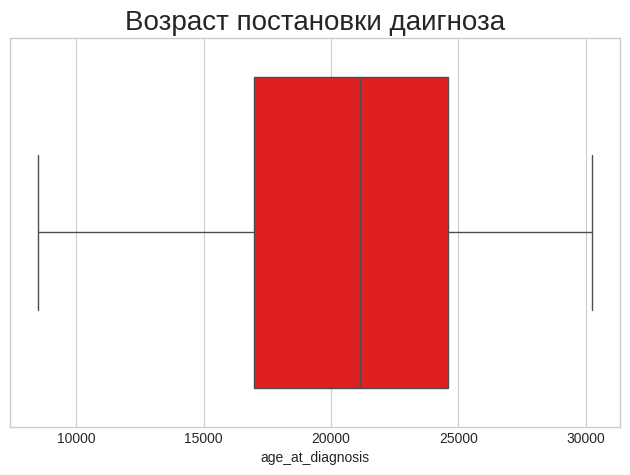

In [201]:
# Box plot
plt.style.use('seaborn-whitegrid')
sns.boxplot(data=df, x='age_at_diagnosis', color='red')
# Отображение заголовка
plt.suptitle('Возраст постановки даигноза', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
# Отображение графика
plt.show()

In [203]:
df['age_at_diagnosis'].describe()

,age_at_diagnosis
count,96.000000
mean,20731.354167
std,5080.518956
min,8493.000000
25%,16998.250000
50%,21146.500000
75%,24607.750000
max,30256.000000


Количественная переменная. Представлена в даипазоне от 8493 дней до 30256 дней. Визуально распределение похоже на нормальное.

#### treatment_type

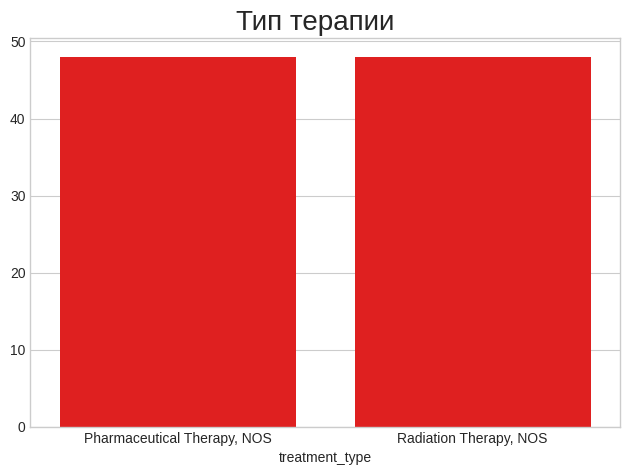

In [204]:
# Подсчет количества уникальных значений признака
value_counts = df['treatment_type'].value_counts()
# Столбчатая диаграмма
plt.style.use('seaborn-whitegrid')
sns.barplot(x=value_counts.index, y=value_counts.values, color='red')
# Отображение заголовка
plt.suptitle('Тип терапии', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
# Отображение графиков
plt.show()

Качественная переменная. Данные сбалансированы. Представлена двумя категориями: химиотерапия и радиотерапия.

### Cформулировать гипотезу о взаимосвязи ваших параметров (например, смертность при раке зависит от пола) и проверить ее с помощью подходящего метода визуализации.

Гипотеза: смертность при раке зависит от возраста постановки диагноза.

H0 - нет статистически значимых различий в смертности от рака (vital_status) для пациентов, получивших дагноз в разных возрастах (age_at_diagnosis).

H1 - есть статистически значимые различия в смертности от рака (vital_status) для пациентов, получивших дагноз в разных возрастах (age_at_diagnosis).

Выборки независимые.

Независимая переменная - возраст постановки диагноза (age_at_diagnosis).

Зависимая переменная - жизненный статус (vital_status).


<Axes: xlabel='vital_status', ylabel='age_at_diagnosis'>

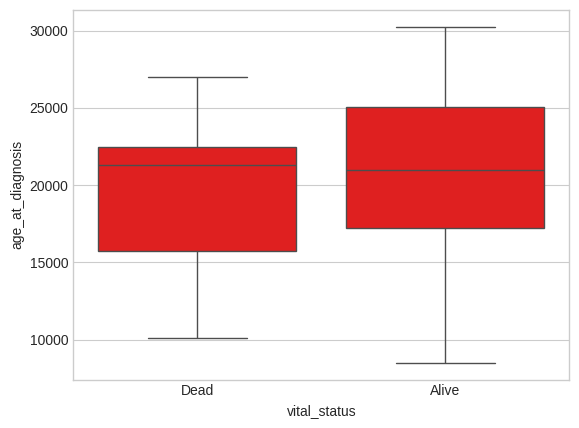

In [210]:
sns.boxplot(x ='vital_status', y ='age_at_diagnosis', data = df, color='red')

Судя по ящикам с усами, возраст постановки диагноза не влияет на смертность от рака.

Чтобы проверить гипотезу статистически, сначала необходимо проверить данные на нормальность распределения. Данные количественные.

In [216]:
shapiro(df.loc[df['vital_status'] == 'Alive', 'age_at_diagnosis'])

ShapiroResult(statistic=0.9722643424588681, pvalue=0.08639554722565305)

In [217]:
shapiro(df.loc[df['vital_status'] == 'Dead', 'age_at_diagnosis'])

ShapiroResult(statistic=0.9046610415014913, pvalue=0.06931090198340348)

p-value > 0.05, следовательно отвергаем нулевую гипотезу, что данные распределены нормально, и принимаем альтернативную.

In [223]:
df['vital_status'] = df['vital_status'].replace({'Dead': 0, 'Alive': 1})
df['vital_status']

,vital_status
0,0
1,0
2,0
3,0
4,0
...,...
91,1
92,1
93,1
94,1


In [231]:
df['vital_status'].value_counts(dropna=False)

,count
vital_status,
1,78
0,18


Одна из выборок < 30 значений, имеет смысл использовать критерий Манна-Уитни.

In [232]:
mannwhitneyu(df.loc[df['vital_status'] == 0, 'age_at_diagnosis'], df.loc[df['vital_status'] == 1, 'age_at_diagnosis'], alternative='two-sided')

MannwhitneyuResult(statistic=644.0, pvalue=0.5893119304812655)

p-value > 0.05, следовательно мы не можем отвергнуть нулеую гипотезу о том, что статистически значимых различий нет.
